# Lab Three: Clustering
### Laura Ahumada, Kevin Boyd, Shikha Pandey, Duy Nguyen
##### Southern Methodist University
##### Fall, 2022

# Business Understanding
LINK TO DATA https://www.kaggle.com/datasets/danielgrijalvas/movies

***!! TO be updated***

In [113]:
# Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express
from sklearn import metrics
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [114]:
# Import file
df = pd.read_csv("movies.csv")
df.head()

,name,rated,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rated     7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [116]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [117]:
# Displaying all possible "categories" of our attributes
for column in df:
    print(df[column].value_counts().sort_index().index)

Index([''71', ''Round Midnight', ''night, Mother', '*batteries not included',
       '10 Cloverfield Lane', '10 Things I Hate About You', '10 Years',
       '10 to Midnight', '10,000 BC', '101 Dalmatians',
       ...
       'Zoom', 'Zoot Suit', 'Zootopia', 'Zorro: The Gay Blade', '[Rec]²',
       'eXistenZ', 'xXx', 'xXx: Return of Xander Cage',
       'xXx: State of the Union', 'Æon Flux'],
      dtype='object', length=7512)
Index(['Approved', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-14',
       'TV-MA', 'TV-PG', 'Unrated', 'X'],
      dtype='object')
Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Western'],
      dtype='object')
Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004,

# Data Understanding

## Data types
### Meaning and Type of Data
+ The original data consists of 7668 transactions (rows) and 14 attributes (columns). The description of these attributes can be self-explanatory without further input. One interesting can be said about the continuous variables is they're all floats with 1 decimal place, besides *year*, giving us an idea to use such variables in this clustering project.


| Attribute | Type | Values | 
| --- | --- | --- |
| name | *Discrete, Nominal* | `*Various movie titles` 
| rated | *Discrete, Ordinal* | `'Approved', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'Unrated', 'X'`
| genre | *Discrete, Ordinal* | `'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Western'` 
| year | *Continuous, Ratio* | `1980 - 2020` 
| released | *Continuous, Interval* | `'1981 - 2016 (*Country)'` 
| score| *Continuous, Ratio* | `1.9 - 9.3` 
| votes | *Continuous, Ratio* | `7.0 - 2400000.0` 
| director | *Discrete, Nominal* | `*Various directors` 
| writer | *Discrete, Nominal* | `*Various writers` 
| star  | *Discrete, Nominal* | `*Various leading stars` 
| country  | *Discrete, Nominal* | `'Argentina', 'Aruba', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czech Republic', 'Denmark', 'Federal Republic of Yugoslavia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kenya', 'Lebanon', 'Libya', 'Malta', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Philippines', 'Poland', 'Portugal', 'Republic of Macedonia', 'Romania', 'Russia', 'Serbia', 'South Africa', 'South Korea', 'Soviet Union', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States', 'Vietnam', 'West Germany', 'Yugoslavia'` 
| budget | *Continuous, Ratio* | `3000.0 - 356000000.0` 
| gross | *Continuous, Ratio* | `309.0 - 2847246203.0` 
| company | *Discrete, Nominal* | `*Various companies` 
| runtime | *Continuous, Ratio* | `55.0 - 366.0` 


# Data Quality

### Missing Values & Outliers

In [118]:
df.isnull().sum()

name           0
rated         77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

+ We see missing values in 11 out of 15 columns, with *budget* having missing the most values (2171 out of 7668 missing). 
+ Note: This is not a mistake because budget numbers for movies is often mislead by movie studios due to whether the movie is successful or failed.
+ We can solve this by using *End of Distribution* Imputation, or add standard deviation noise to our median imputes. We must first look at the distribution of *budget* using plots.

[Text(0.5, 0, '')]

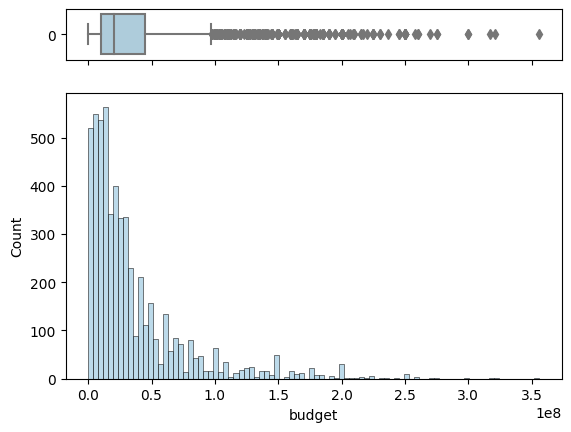

In [119]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["budget"], orient="h", ax=ax_box)
sns.histplot(df["budget"], ax=ax_hist)
ax_box.set(xlabel='')

In [120]:
# EOD Function
def eod_impute(df, variable, median, eod_val):
    df[variable] = df[variable].fillna(eod_val)

In [121]:
median = df["budget"].median()
eod_val = df.budget.mean()+3*df.budget.std()
eod_impute(df,'budget', median, eod_val)

[Text(0.5, 0, '')]

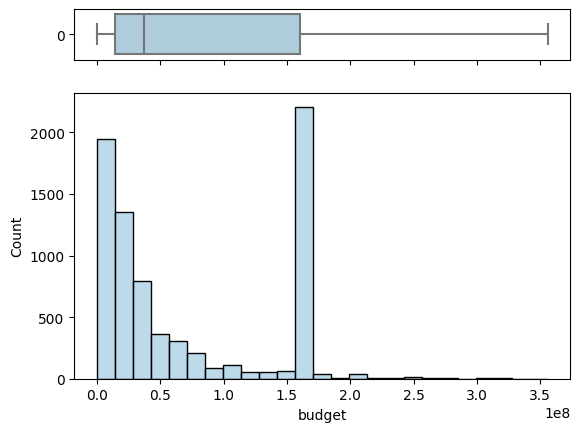

In [122]:
# Sanity Check
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["budget"], orient="h", ax=ax_box)
sns.histplot(df["budget"], ax=ax_hist)
ax_box.set(xlabel='')

In [123]:
df.isnull().sum()

name          0
rated        77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       4
dtype: int64

+ We will also look at *gross* because it has missing continuous values and seem to be important when clustering.

[Text(0.5, 0, '')]

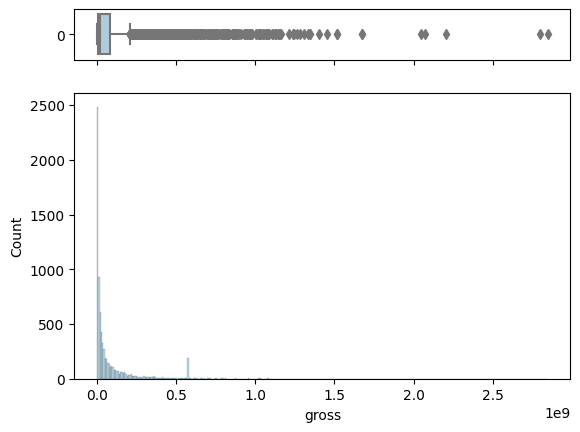

In [124]:
# gross
median = df["gross"].median()
eod_val = df.gross.mean()+3*df.gross.std()
eod_impute(df,"gross", median, eod_val)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["gross"], orient="h", ax=ax_box)
sns.histplot(df["gross"], ax=ax_hist)
ax_box.set(xlabel='')

+ Of course we did not see much change in the plots because the imputed values are minimal but still valuable to deal with.
+ Outliers in *gross* are reasonable because high gross tend to belong to a few movies.

In [125]:
df.isnull().sum()

name         0
rated       77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

+ Nulls in discrete variables tend to be neglible but should not get in the way of clustering.
+ We will now look at the boxplots of score, votes, and runtime to check for outliers.

<AxesSubplot: >

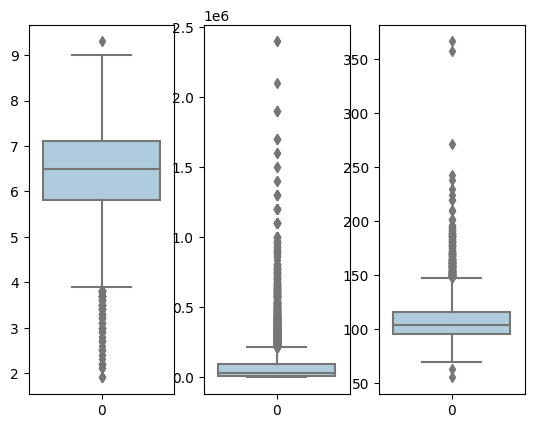

In [126]:
f, ax = plt.subplots(1, 3)
sns.boxplot(df["score"], orient="v", ax=ax[0])
sns.boxplot(df["votes"], orient="v", ax=ax[1])
sns.boxplot(df["runtime"], orient="v", ax=ax[2])

+ Values that are out of the average box range can be self-explanatory. There are a few movies that get really high scores and really low scores, really high number of votes, and really long runtimes.

### Duplicates

In [127]:
df[df.duplicated()].count()

name        0
rated       0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

+ No duplicates are found.


### 1 Extra Variable
+ It could be beneficial to create a yes/no variable that determines whether if a movie earned at least its budget back as gross. This can allow us to assume that such movie now has room for the costs of marketing, producing and other proceedings. 
+ A movie is only succesfull when it outperformed its potential predicted by data scientists.

In [128]:
df["breakeven"] = np.where(df["gross"] > df["budget"], 1, 0)
df["breakeven"].value_counts(normalize=True)

1    0.506781
0    0.493219
Name: breakeven, dtype: float64

+ Half of our sample managed to break even in terms of gross vs budget. We can now use this variable to "hue" our plots!

# Data Visualization

### Distribution of Continuous Data 
+ Normal distribution of *year* except the year 2000.
+ *score* is left-skewed but normal enough.
+ *votes* and *gross* have a majority of the data on the left end. This tells us a relationship between these two variables, which means that there are lots of unpopular films and lots of unsuccessful films. This might be valuable to our clustering analysis later on.
+ Both *budget* and *runtime* are right-skewed, which tells us that there aren't a lot of high-budgeted film makers, but not as strong as a reference to the roughly normal distribution of *runtime*.

year


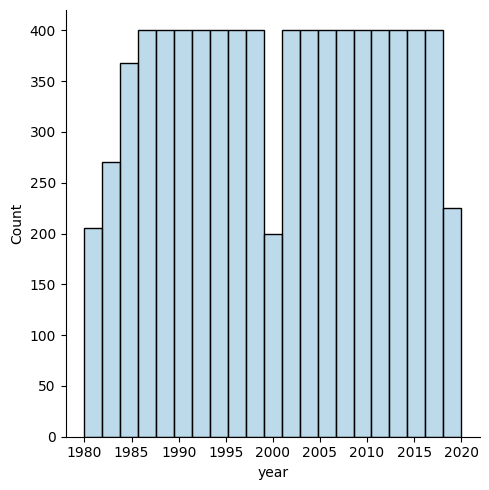

score


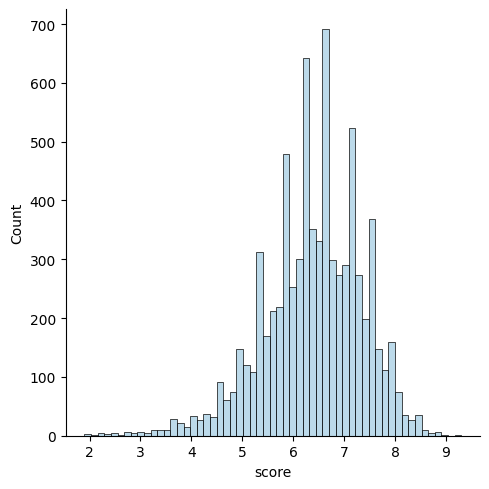

votes


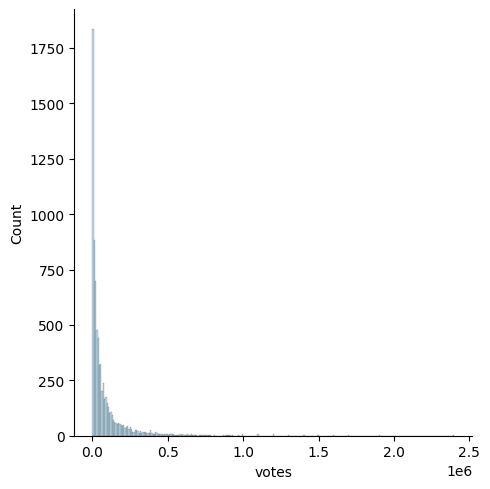

budget


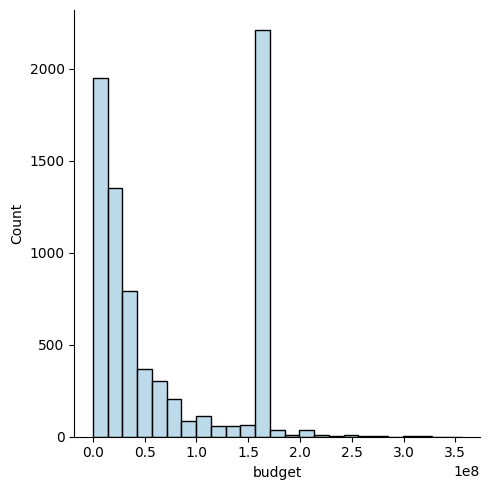

gross


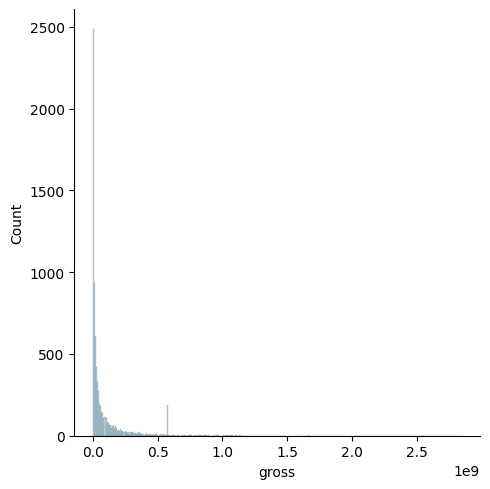

runtime


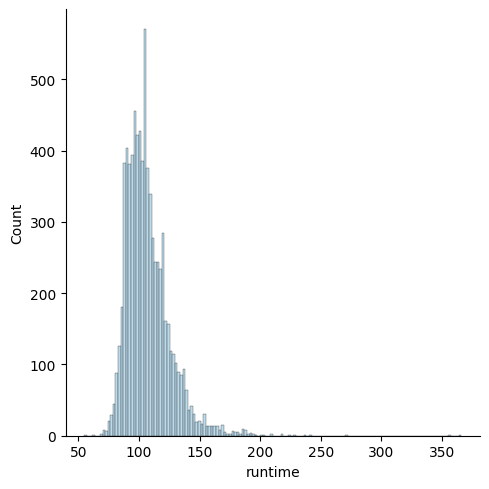

breakeven


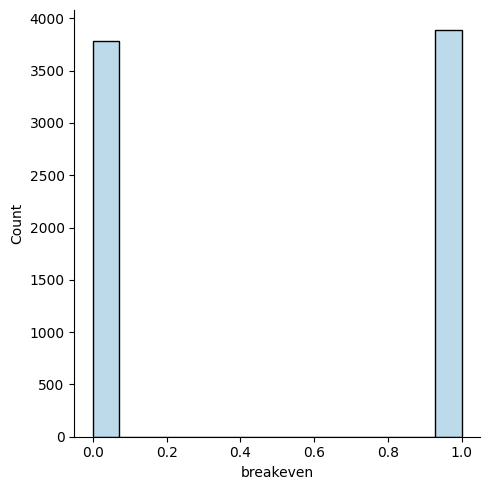

In [129]:
# Creating df of only Continuous variables
num_df = df._get_numeric_data()
sns.set_palette("Paired")
for i in list(num_df):
    print('\033[1m' + i) 
    sns.displot(df[i], kde=False)
    plt.show()

### Distribution of categorical data
+ The only variables that have the most legible plots (due to the many levels that some variables have like *name*) include *rated*, *genre*, and *country*.

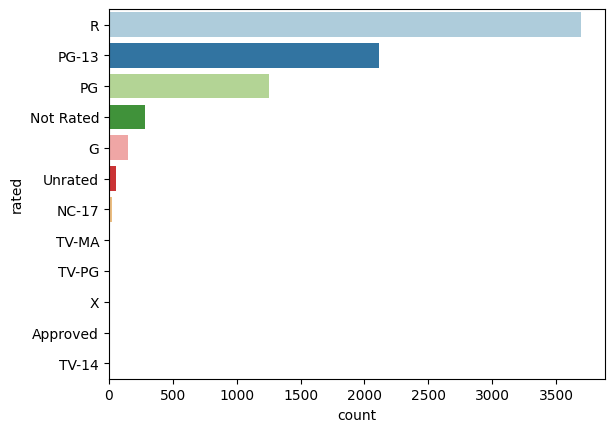

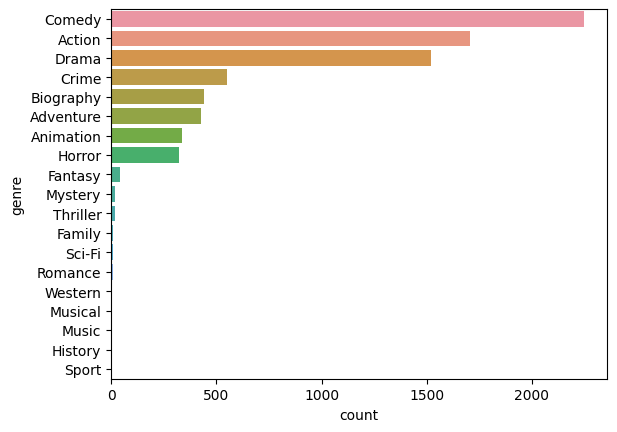

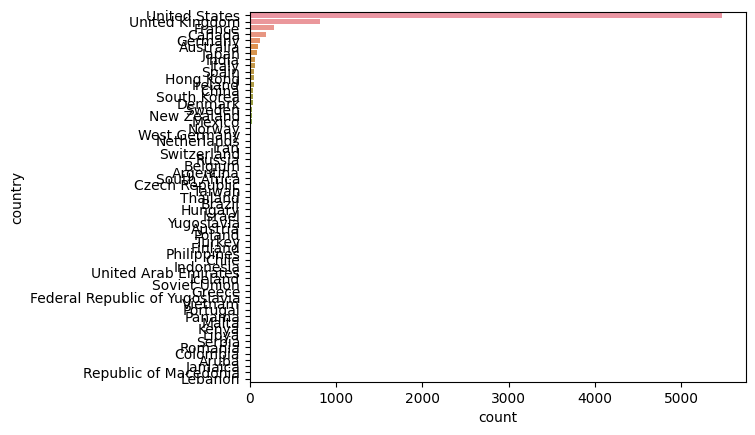

<Figure size 640x480 with 0 Axes>

In [130]:
# Creating df of the 3 stated above
cat_df=df[["rated", "genre", "country"]]

sns.set_palette("Paired")
# Checking the distribution for each factor
for i in cat_df.columns:
    sns.countplot( y= i, data = df, orient= 'h',
    order=df[i].value_counts().index)
    plt.figure()


In [131]:
print("Rated R: ", round(df['rated'].value_counts(normalize=True)[0]*100, 3), "%")
print(round(df['genre'].value_counts(normalize=True)[0:3]*100, 3))
print(round(df['country'].value_counts(normalize=True)[0:10]*100, 3))

Rated R:  48.702 %
Comedy    29.278
Action    22.235
Drama     19.797
Name: genre, dtype: float64
United States     71.429
United Kingdom    10.646
France             3.640
Canada             2.479
Germany            1.526
Australia          1.200
Japan              1.057
India              0.809
Italy              0.796
Spain              0.613
Name: country, dtype: float64


+ We might get valuable information about the data when looking at the seperation of the levels of these 3 categorical variables once we one-hot encode them.

### Relational Behaviors
+ From the below plot, *breakeven* cannot be used to determine the clustering of our dataset, so we can omit it.

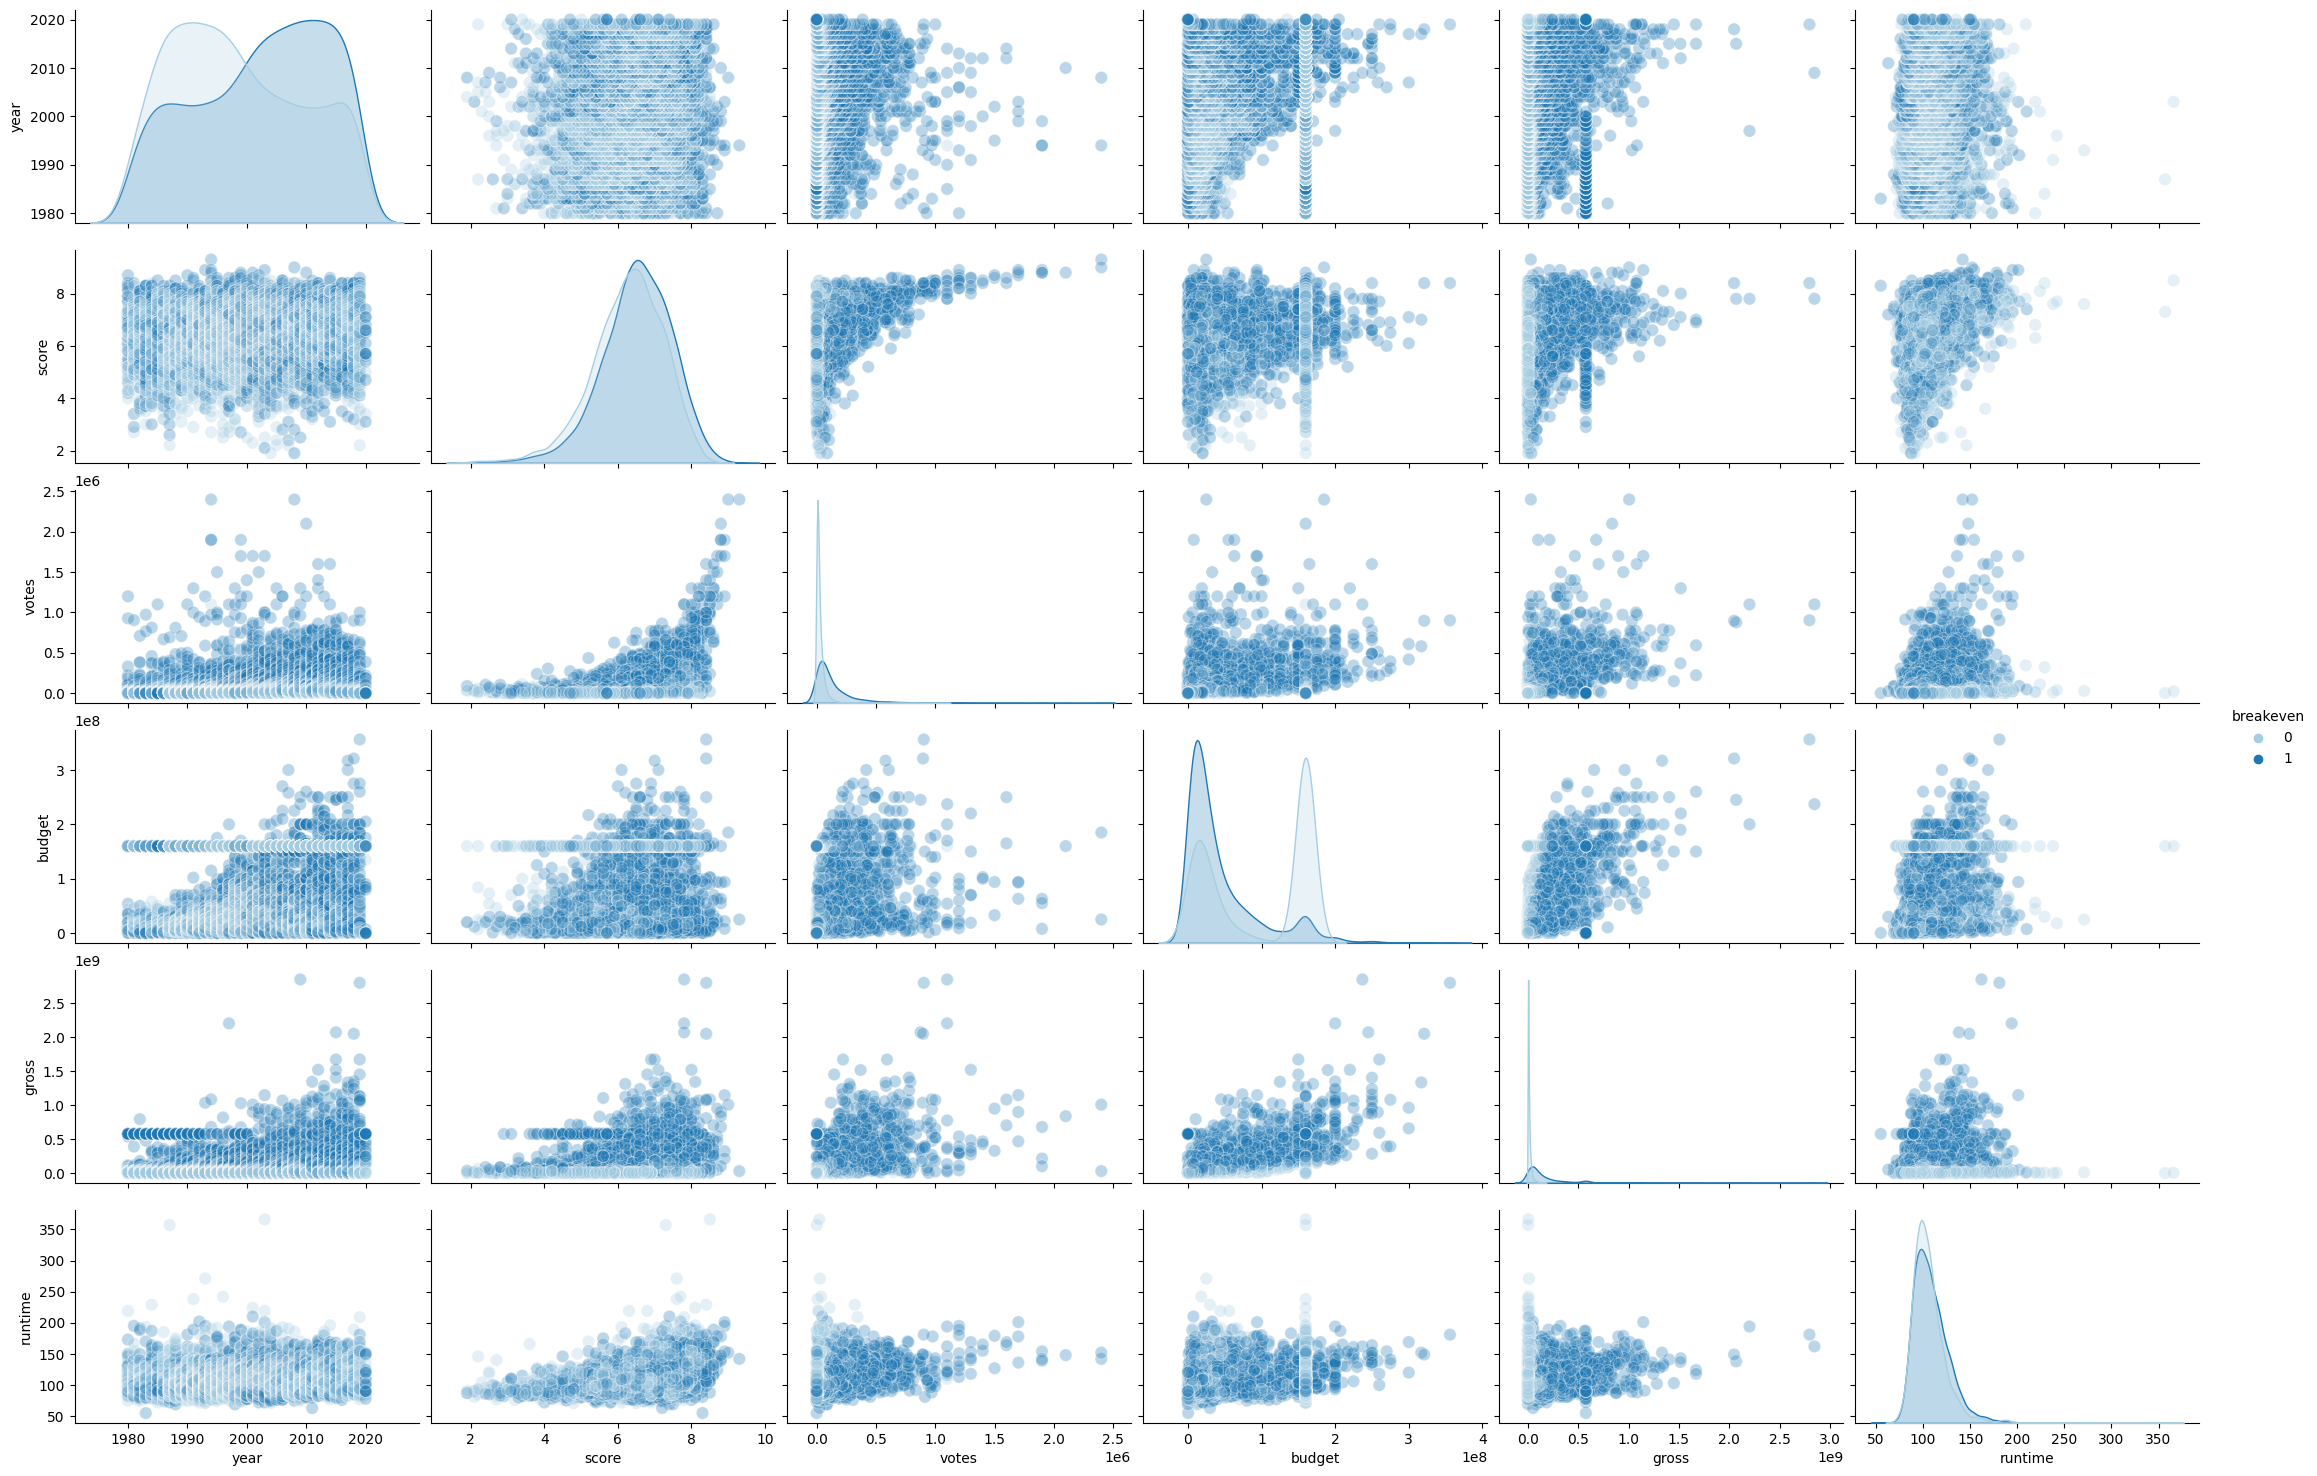

In [132]:
#sns.set_theme(palette="pastel")
sns.pairplot(data=df, hue="breakeven", aspect=1.5,
             plot_kws=dict(s=80, alpha=0.3))

### Correlation Plot
+ As expected, *votes* and *gross* have the highest correlation with each other compared to other pairs, therefore they are our focus when applying our clusters to 2.

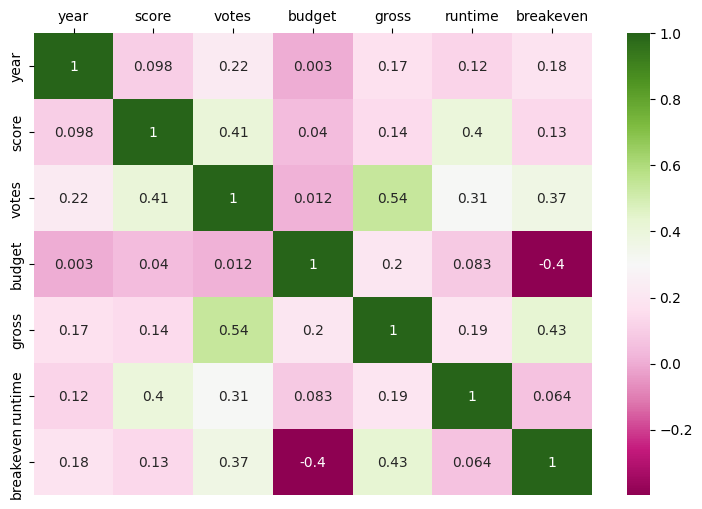

In [133]:
plt.figure(figsize=(9,6))
ax = sns.heatmap(num_df.corr(), annot=True, cmap="PiYG")
ax.xaxis.tick_top()

# Modeling and Evaluation: Cluster Analysis 
* Perform cluster analysis using several clustering methods 
* How did you determine a suitable number of clusters for each method? 
* Use internal and/or external validation measures to describe and compare the clusterings and the clusters (some visual methods would be good). 
* Describe your results. What findings are the most interesting and why? 

### Prepping

In [134]:
num_df.head()

,year,score,votes,budget,gross,runtime,breakeven
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0,1
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0,1
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,1
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0,1
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0,1


In [135]:
print("There are", len(num_df[num_df.isna().any(axis=1)]), "rows with NaN.")

There are 7 rows with NaN.


In [136]:
# DISPLAY rows that have NaN
print(num_df[num_df.isna().any(axis=1)])

      year  score     votes        budget         gross  runtime  breakeven
5728  2010    5.6   93000.0  1.599618e+08  5.756759e+08      NaN          1
5730  2010    5.8  104000.0  1.599618e+08  5.756759e+08      NaN          1
6195  2012    5.3   41000.0  4.000000e+07  3.808416e+07      NaN          0
7661  2020    NaN       NaN  1.000000e+06  5.756759e+08    121.0          1
7662  2020    NaN       NaN  1.000000e+04  5.756759e+08     90.0          1
7665  2020    5.7      29.0  5.875000e+04  5.756759e+08      NaN          1
7666  2020    NaN       NaN  1.500000e+04  5.756759e+08    120.0          1


In [137]:
# EOD impute all num vars
for column in num_df:
    median = num_df[column].median()
    eod_val = num_df.gross.mean()+3*num_df.gross.std()
    eod_impute(num_df,column, median, eod_val)

In [138]:
print("There are now", len(num_df[num_df.isna().any(axis=1)]), "rows with NaN.")

There are now 0 rows with NaN.


In [139]:
# normalizing our data
df_norm = normalize(num_df)
df_norm = pd.DataFrame(df_norm, columns=num_df.columns)
df_norm.head()

,year,score,votes,budget,gross,runtime,breakeven
0,0.000039,1.656723e-07,0.018283,0.374735,0.926952,2.879542e-06,1.972289e-08
1,0.000034,9.826356e-08,0.001101,0.076239,0.997089,1.761967e-06,1.694199e-08
2,0.000004,1.615067e-08,0.002228,0.033415,0.999439,2.301935e-07,1.856399e-09
3,0.000024,9.218555e-08,0.002646,0.041903,0.999118,1.053549e-06,1.197215e-08
4,0.000049,1.811608e-07,0.002680,0.148899,0.988849,2.432022e-06,2.481655e-08


In [140]:
# year is not applicable for our clustering purpose
df_norm = df_norm.drop('year', axis=1)
df_norm.head()

,score,votes,budget,gross,runtime,breakeven
0,1.656723e-07,0.018283,0.374735,0.926952,2.879542e-06,1.972289e-08
1,9.826356e-08,0.001101,0.076239,0.997089,1.761967e-06,1.694199e-08
2,1.615067e-08,0.002228,0.033415,0.999439,2.301935e-07,1.856399e-09
3,9.218555e-08,0.002646,0.041903,0.999118,1.053549e-06,1.197215e-08
4,1.811608e-07,0.002680,0.148899,0.988849,2.432022e-06,2.481655e-08


### Suitable Number of Clusters
* The graph below shows a significant change in inertia at both 2 and 3 clusters.

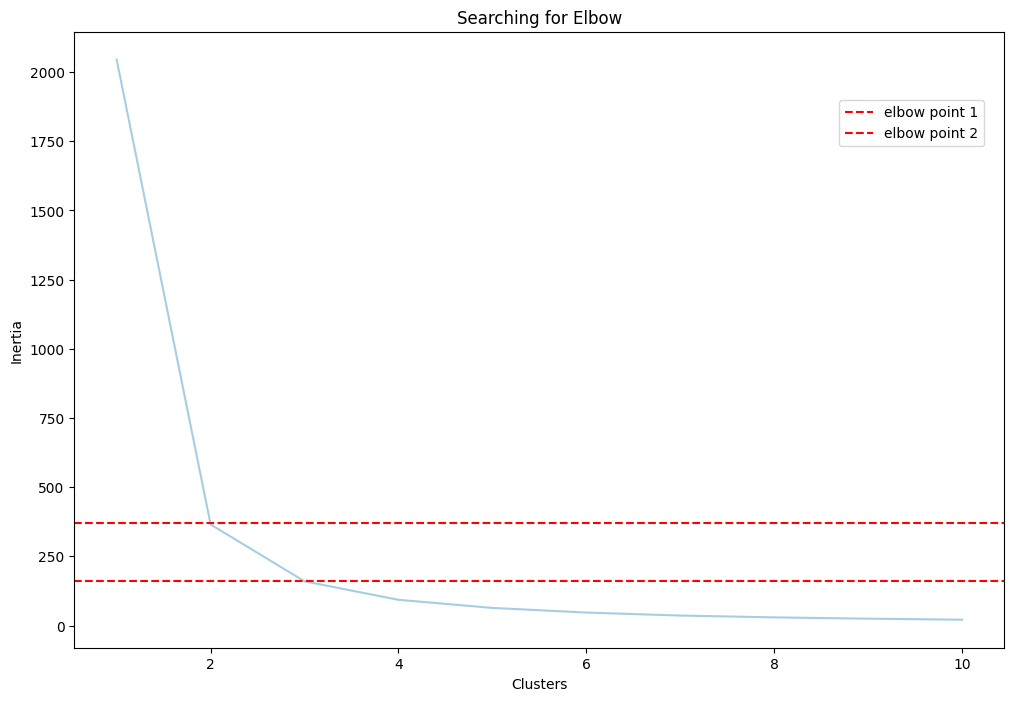

In [146]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df_norm)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.axhline(y=370, color ="r", linestyle="dashed", label="elbow point 1")
ax.axhline(y=160, color ="r", linestyle="dashed", label="elbow point 2")
plt.legend(bbox_to_anchor = (0.9, 0.9), loc = 'upper center')

plt.show()

### KNN++

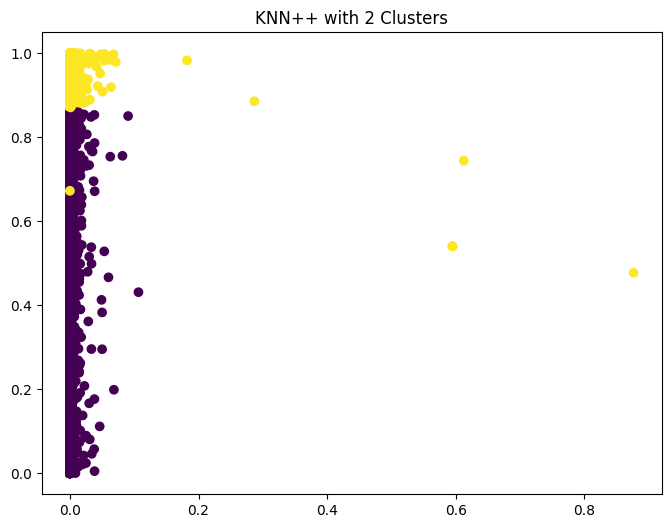

In [158]:
knnpp = KMeans(init='k-means++', n_clusters=2, random_state=1).fit(df_norm)
df_norm["labels"] = knnpp.labels_
plt.figure(figsize=(8, 6))
plt.scatter(df_norm['votes'], df_norm['gross'], c=df_norm["labels"])
plt.title('KNN++ with 2 Clusters')
plt.show()

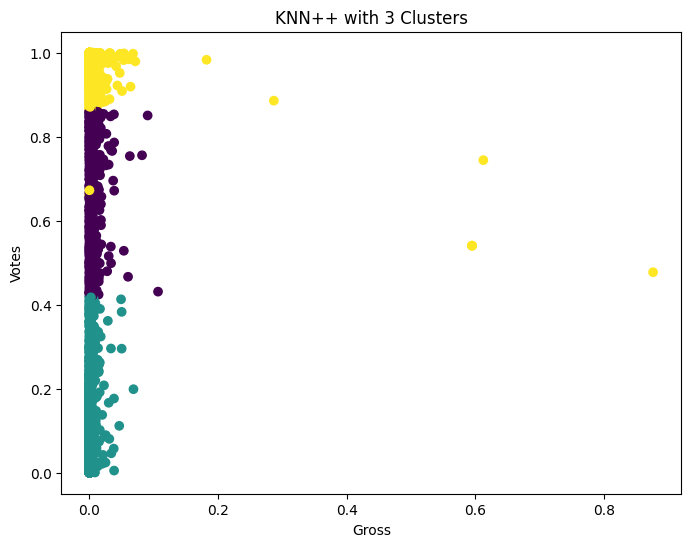

In [164]:
# compare 2 with 3 clusters
knnpp = KMeans(init='k-means++', n_clusters=3, random_state=1).fit(df_norm)
df_norm["labels"] = knnpp.labels_
plt.figure(figsize=(8, 6))
plt.scatter(df_norm['votes'], df_norm['gross'], c=df_norm["labels"])
plt.xlabel('Gross')
plt.ylabel('Votes')
plt.title('KNN++ with 3 Clusters')
plt.show()

+ The clusters are well defined but not actually seperated, however it is more so at 3 clusters.
+ To further analyze our 3 clusters:
    + top color is high votes, low gross
    + middle color is mid votes, low gross
    + bottom color is low votes, low gross

### Agglomerative Clustering
* Sampling data to only 1000 because agglomerative is inefficient with large data

In [ ]:
modelDf

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(modelDf)
len(labels)


In [ ]:
df["labels"]=labels
df

In [ ]:
df_1 = df[df['labels'] == 1] 
df_0 = df[df['labels'] == 0] 
plt.figure(figsize=(10, 7))  
plt.scatter(df_1['age'], df_1['income'], c = df_1['labels'], marker="s", edgecolor="green", alpha=0.5)
plt.scatter(df_0['age'], df_0['income'], c = df_0['labels'], edgecolor="red", alpha=0.5)

In [ ]:
df[df['labels'] == 1] 

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(modelDf_1000['capital.loss'], modelDf_1000['Income'], c = labels) 

In [ ]:
x=modelDf
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
kmeans.labels_

In [ ]:
df["labels"]=kmeans.labels_

In [ ]:
df[df["labels"]==0].describe()

In [ ]:
df[df["labels"]==1].describe()

In [ ]:
df[df["labels"]==2].describe()

In [ ]:
#Peforming DBSCAN

n_clusters = 2
model = DBSCAN(eps=0.15, min_samples=10).fit(x)
labels = model.labels_


Deployment (10 points total) 
• Be critical of your performance and tell the reader how you current model might be usable by 
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? 
• How useful is your model for interested parties (i.e., the companies or organizations 
that might want to use it)? 
• How would your deploy your model for interested parties?  
• What other data should be collected?  
• How often would the model need to be updated, etc.? 

In [ ]:
# an example using SpectralClustering, which assumes that the graphical data needs to be calculated from the structure
from sklearn.cluster import SpectralClustering

X = 
nclust = 5

# If a string, this may be one of 
#  ‘nearest_neighbors’, ‘precomputed’, ‘rbf’ 
#  or one of the kernels supported by sklearn.metrics.pairwise_kernels
spc = SpectralClustering(n_clusters=nclust, affinity = 'nearest_neighbors')
labels = spc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
                    cmap=plt.cm.rainbow, s=5, linewidths=0)

plt.show()